<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [19]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

# Let's take a look at the first 10 rows of the dataset

In [20]:
# Preview the data
netflix_df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV
5,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies
6,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
7,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,118,"When a doctor goes missing, his psychiatrist w...",Horror Movies
8,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,143,An architect and his wife move into a castle t...,Horror Movies
9,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,"October 20, 2017",2017,103,A farmer pens a confession admitting to his wi...,Dramas


# EDA

## Exploring Dataset Dimensions
We ensure there are no duplicate values in the dataset to facilitate easier and more accurate analysis.

In [21]:
fs=netflix_df.shape
print('Original shape : {}'.format(fs))

df = netflix_df.drop_duplicates()

ns= df.shape
print('There were {} duplicates'.format((fs[0])-(ns[0])))
print('New shape : {}'.format(ns))

Original shape : (4812, 11)
There were 0 duplicates
New shape : (4812, 11)


In [24]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} colums')

The dataset has 4812 rows and 11 colums


In [25]:
print(f'The dataset has {sum(df.isnull().sum())} null values')

The dataset has 0 null values


In [26]:
#More information about the dataset and the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


In [27]:
#Metrics of the distribution of all numeric features in the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,4812.0,2012.711554,9.517978,1942.0,2011.0,2016.0,2018.0,2021.0
duration,4812.0,99.566708,30.889305,1.0,88.0,99.0,116.0,253.0


In [28]:
#listed columns of the dataset
print(f'The dataset has the following colums {df.columns}')

The dataset has the following colums Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre'],
      dtype='object')


# What was the most frequent movie duration in the 1990s? Save an approximate answer as an integer called duration.

To answer this, we need to filter the dataset to include only movies released between 1990 and 1999, and then determine the most frequent movie duration.

In [32]:
#movies where released year is between 1990 and 1999
movies1990 = df[((df['release_year'] >= 1990) & (df['release_year'] <=1999)) & (df['type'] == 'Movie')]

In [33]:
#count of movies
print(f'There are {movies1990.shape[0]} movies that are made in 1990')

There are 183 movies that are made in 1990


In [34]:
#lest take a look of the first rows
movies1990.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
6,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
118,s167,Movie,A Dangerous Woman,Stephen Gyllenhaal,"Debra Winger, Barbara Hershey, Gabriel Byrne, ...",United States,"April 1, 2018",1993,101,At the center of this engrossing melodrama is ...,Dramas
145,s211,Movie,A Night at the Roxbury,John Fortenberry,"Will Ferrell, Chris Kattan, Dan Hedaya, Molly ...",United States,"December 1, 2019",1998,82,"After a run-in with Richard Grieco, dimwits Do...",Comedies
167,s239,Movie,A Thin Line Between Love & Hate,Martin Lawrence,"Martin Lawrence, Lynn Whitfield, Regina King, ...",United States,"December 1, 2020",1996,108,When a philandering club promoter sets out to ...,Comedies
194,s274,Movie,Aashik Awara,Umesh Mehra,"Saif Ali Khan, Mamta Kulkarni, Mohnish Bahl, S...",India,"June 1, 2017",1993,154,"Raised by a kindly thief, orphaned Jimmy goes ...",Dramas


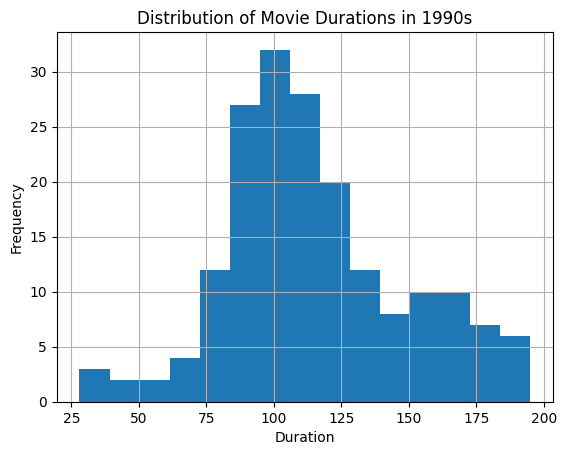

In [43]:
fig, ax = plt.subplots()
ax.hist(movies1990['duration'], bins=15)
ax.set_xlabel('Duration')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Movie Durations in 1990s')
plt.grid(True)
plt.show()

In [45]:
duration = movies1990['duration'].mode().values[0]
print(f"the most frequent movie duration in the 1990s is {duration} minutes")

the most frequent movie duration in the 1990s is 94 minutes


# A movie is considered short if it is less than 90 minutes. Count the number of short action movies released in the 1990s and save this integer as short_movie_count.

To accomplish this, we need to filter the dataset for movies with a duration of less than 90 minutes and belonging to the action genre.

In [47]:
short_movie_count = movies1990[(movies1990['duration'] <90) & (movies1990['genre'] == 'Action')]
print(f'There are {short_movie_count.shape[0]} short action movies released in the 1990s')

There are 7 short action movies released in the 1990s


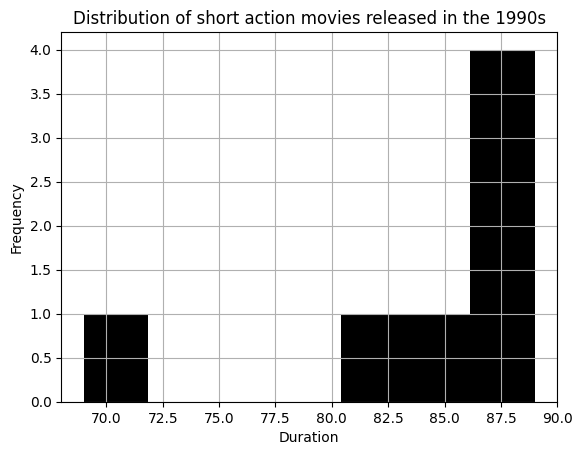

In [50]:
fig, ax = plt.subplots()
ax.hist(short_movie_count['duration'], bins=7 , color="black")
ax.set_xlabel('Duration')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of short action movies released in the 1990s')
plt.grid(True)
plt.show()